In [78]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#from sklearn.impute import SimpleImputer



In [215]:
#Tablas ligeras
df_airlineDelay = pd.read_csv('airline_delay.csv')
df_airlines = pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')
df_cancellationCode = pd.read_csv('cancellation_codes.csv')

In [159]:
#Tablas pesadas
#df_dosmil15 = pd.read_csv('2015.csv')
df_flights = pd.read_csv('flights.csv')

C:\Users\Carlos\AppData\Local\Temp\ipykernel_2032\1196037153.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('flights.csv')


In [15]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

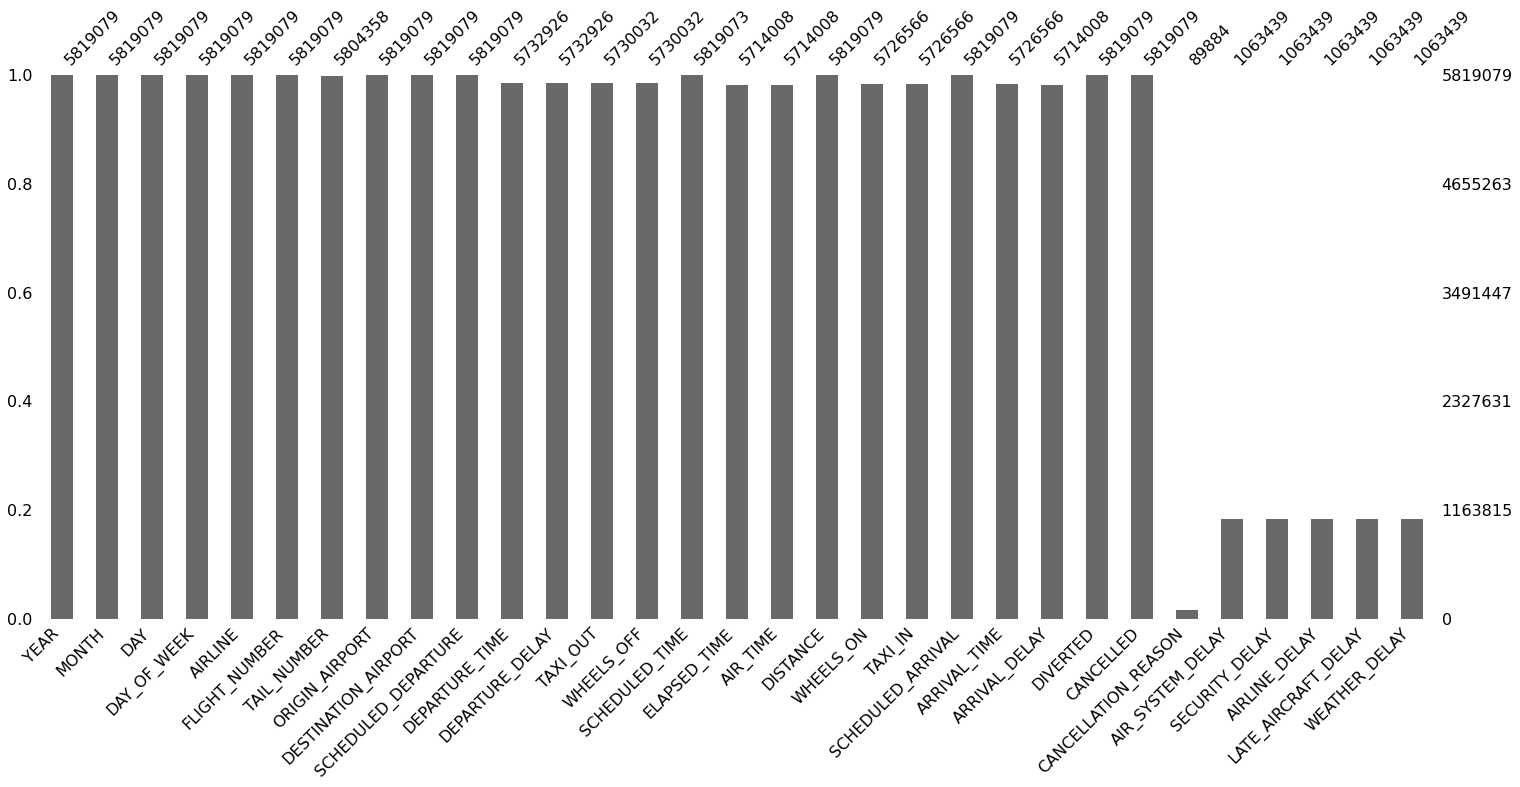

In [20]:
msno.bar(df_flights)
plt.show()

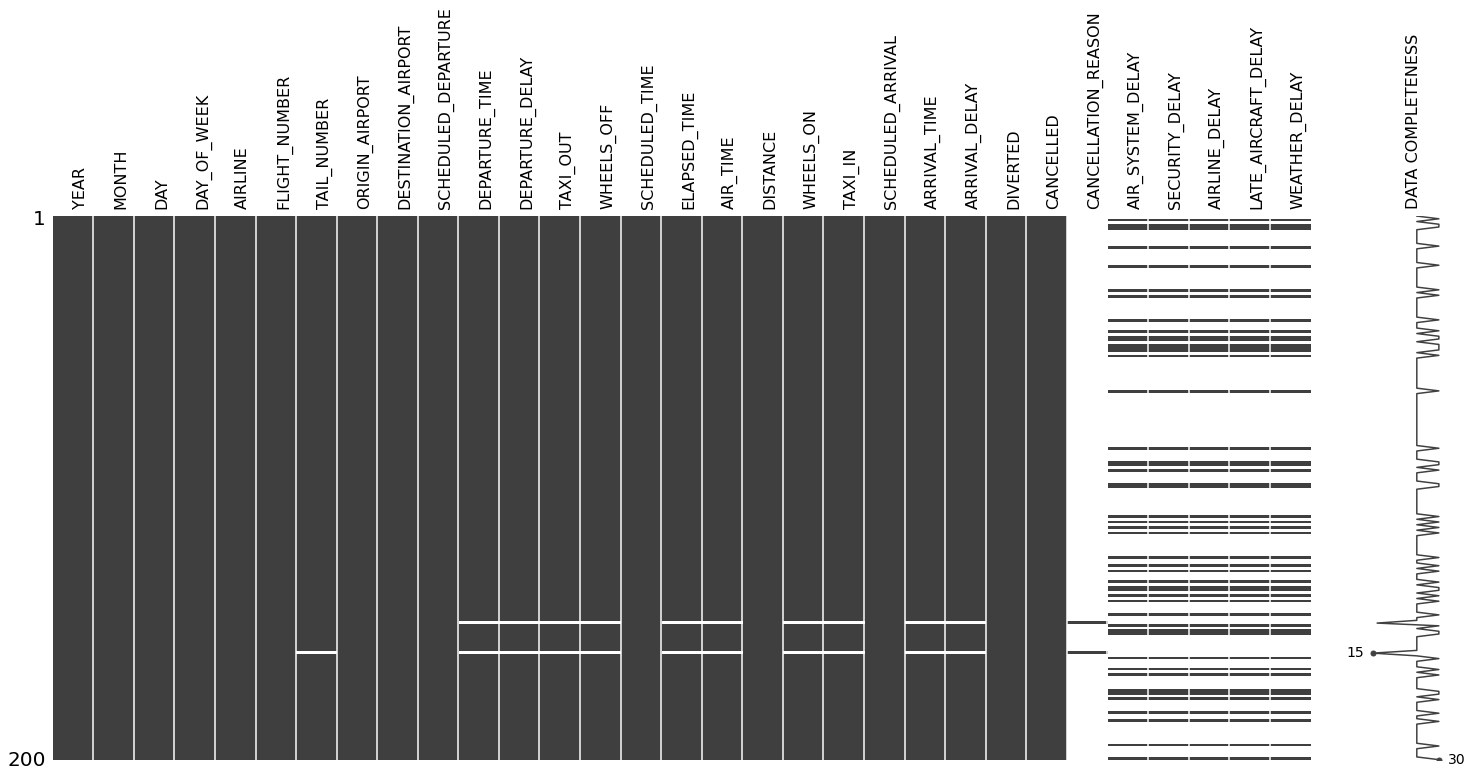

In [21]:
msno.matrix(df_flights.sample(200), labels = True, label_rotation = 90)
plt.show()

In [160]:
def compile_null_ratio(df):
    null_ratio = pd.DataFrame(df.isnull().sum() / df.shape[0])
    null_ratio.reset_index(inplace=True)
    null_ratio.columns = ['Columna','nan_porcentaje']
    print('El ratio de null por columna es:')
    print(null_ratio)
    return null_ratio

In [161]:
compile_null_ratio(df_flights)

El ratio de null por columna es:
                Columna  nan_porcentaje
0                  YEAR        0.000000
1                 MONTH        0.000000
2                   DAY        0.000000
3           DAY_OF_WEEK        0.000000
4               AIRLINE        0.000000
5         FLIGHT_NUMBER        0.000000
6           TAIL_NUMBER        0.002530
7        ORIGIN_AIRPORT        0.000000
8   DESTINATION_AIRPORT        0.000000
9   SCHEDULED_DEPARTURE        0.000000
10       DEPARTURE_TIME        0.014805
11      DEPARTURE_DELAY        0.014805
12             TAXI_OUT        0.015303
13           WHEELS_OFF        0.015303
14       SCHEDULED_TIME        0.000001
15         ELAPSED_TIME        0.018056
16             AIR_TIME        0.018056
17             DISTANCE        0.000000
18            WHEELS_ON        0.015898
19              TAXI_IN        0.015898
20    SCHEDULED_ARRIVAL        0.000000
21         ARRIVAL_TIME        0.015898
22        ARRIVAL_DELAY        0.018056
23     

,Columna,nan_porcentaje
0,YEAR,0.000000
1,MONTH,0.000000
2,DAY,0.000000
3,DAY_OF_WEEK,0.000000
4,AIRLINE,0.000000
5,FLIGHT_NUMBER,0.000000
6,TAIL_NUMBER,0.002530
7,ORIGIN_AIRPORT,0.000000
8,DESTINATION_AIRPORT,0.000000
9,SCHEDULED_DEPARTURE,0.000000


In [27]:
df_flights.CANCELLATION_REASON.value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [30]:
df_flights.CANCELLATION_REASON.isnull().sum()

5729195

In [40]:
def maxindice(df):
    num=999999
    if num < len(df):
        salida = num
    else:
        salida = len(df)
    return salida


999999


In [57]:
frag=1000000
print(2*(frag+1))

2000002


In [70]:
df1 = df_flights.iloc[0:frag]
df2 = df_flights.iloc[frag:2*frag]
df3 = df_flights.iloc[2*frag:3*frag]
df4 = df_flights.iloc[3*frag:4*frag]
df5 = df_flights.iloc[4*frag:5*frag]
df6 = df_flights.iloc[5*frag:]

In [71]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819079 entries, 5000000 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 819079 non-null  int64  
 1   MONTH                819079 non-null  int64  
 2   DAY                  819079 non-null  int64  
 3   DAY_OF_WEEK          819079 non-null  int64  
 4   AIRLINE              819079 non-null  object 
 5   FLIGHT_NUMBER        819079 non-null  int64  
 6   TAIL_NUMBER          817460 non-null  object 
 7   ORIGIN_AIRPORT       819079 non-null  object 
 8   DESTINATION_AIRPORT  819079 non-null  object 
 9   SCHEDULED_DEPARTURE  819079 non-null  int64  
 10  DEPARTURE_TIME       807987 non-null  float64
 11  DEPARTURE_DELAY      807987 non-null  float64
 12  TAXI_OUT             807562 non-null  float64
 13  WHEELS_OFF           807562 non-null  float64
 14  SCHEDULED_TIME       819079 non-null  float64
 15  ELAPSED_TI

In [162]:
#Funcion para identificar las columnas categoricas
def categorical_columns(df):
    categorical_cols = df.select_dtypes('object').columns.tolist()
    print('Columnas categoricas')
    print(categorical_cols)
    return(categorical_cols)

In [163]:
catCol=categorical_columns(df_flights)

Columnas categoricas
['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON']


In [164]:
df_flights.drop(columns=['TAIL_NUMBER'], inplace=True)

In [77]:
df_flights.info()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,LAX,BOS,2359,2355.0,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,JFK,PSE,2359,2355.0,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,JFK,SJU,2359,2350.0,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,MCO,SJU,2359,2353.0,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df_flights.CANCELLATION_REASON.unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [166]:
df_flights.CANCELLATION_REASON.value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [167]:
dataCancel = df_flights[['CANCELLATION_REASON']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
dataCancel = pd.DataFrame(ohe.fit_transform(dataCancel).toarray())

In [168]:
dataCancel.drop(columns=[4], inplace=True)

In [169]:
dataCancel[0].replace(1,2, inplace = True)
dataCancel[1].replace(1,1, inplace = True)
dataCancel[2].replace(1,3, inplace = True)
dataCancel[3].replace(1,4, inplace = True)

In [170]:
cancelR = dataCancel.sum(axis = 1, skipna = True)
cancelR = pd.DataFrame(cancelR)
cancelR.value_counts()

0.0    5729195
1.0      48851
2.0      25262
3.0      15749
4.0         22
dtype: int64

In [171]:
df_flights['CANCELLATION_REASON']=cancelR

In [172]:
# nan Delay cambio por 0
df_flights.AIR_SYSTEM_DELAY.replace(np.nan,0, inplace = True)
df_flights.SECURITY_DELAY.replace(np.nan,0, inplace = True)
df_flights.AIRLINE_DELAY.replace(np.nan,0, inplace = True)
df_flights.LATE_AIRCRAFT_DELAY.replace(np.nan,0, inplace = True)
df_flights.WEATHER_DELAY.replace(np.nan,0, inplace = True)

In [184]:
#Identificar las columnas numericas
def numerical_columns(df,categorical_cols):
    numerical_cols = df.columns.difference(categorical_cols).tolist()
    print('Columnas numericas')
    print(numerical_cols)
    return(numerical_cols)

#Funcion para reemplazar los nan de las columnas numericas con el valor medio en esa columna
def replace_na_numerical_columns(df, numerical_cols):
    for col in numerical_cols:
        valueR = df[col].mean()  # calcula la media
        df[col].fillna(valueR, inplace=True)  # Reemplaza nan por la media

In [202]:
cancelCol = ['ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','WHEELS_OFF','TAXI_OUT','DEPARTURE_DELAY','DEPARTURE_TIME']
for col in cancelCol:
        valor = 0
        df_flights[col].fillna(valor, inplace=True)

In [194]:
MASK = df_flights.CANCELLED == 1

In [203]:
compile_null_ratio(df_flights[MASK])

El ratio de null por columna es:
                Columna  nan_porcentaje
0                  YEAR        0.000000
1                 MONTH        0.000000
2                   DAY        0.000000
3           DAY_OF_WEEK        0.000000
4               AIRLINE        0.000000
5         FLIGHT_NUMBER        0.000000
6        ORIGIN_AIRPORT        0.000000
7   DESTINATION_AIRPORT        0.000000
8   SCHEDULED_DEPARTURE        0.000000
9        DEPARTURE_TIME        0.000000
10      DEPARTURE_DELAY        0.000000
11             TAXI_OUT        0.000000
12           WHEELS_OFF        0.000000
13       SCHEDULED_TIME        0.000056
14         ELAPSED_TIME        0.000000
15             AIR_TIME        0.000000
16             DISTANCE        0.000000
17            WHEELS_ON        0.000000
18              TAXI_IN        0.000000
19    SCHEDULED_ARRIVAL        0.000000
20         ARRIVAL_TIME        0.000000
21        ARRIVAL_DELAY        0.000000
22             DIVERTED        0.000000
23     

,Columna,nan_porcentaje
0,YEAR,0.000000
1,MONTH,0.000000
2,DAY,0.000000
3,DAY_OF_WEEK,0.000000
4,AIRLINE,0.000000
5,FLIGHT_NUMBER,0.000000
6,ORIGIN_AIRPORT,0.000000
7,DESTINATION_AIRPORT,0.000000
8,SCHEDULED_DEPARTURE,0.000000
9,DEPARTURE_TIME,0.000000


In [204]:
replace_na_numerical_columns(df_flights,numerical_columns(df_flights,categorical_columns(df_flights)))


Columnas categoricas
['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
Columnas numericas
['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLATION_REASON', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']


In [205]:
compile_null_ratio(df_flights)

El ratio de null por columna es:
                Columna  nan_porcentaje
0                  YEAR             0.0
1                 MONTH             0.0
2                   DAY             0.0
3           DAY_OF_WEEK             0.0
4               AIRLINE             0.0
5         FLIGHT_NUMBER             0.0
6        ORIGIN_AIRPORT             0.0
7   DESTINATION_AIRPORT             0.0
8   SCHEDULED_DEPARTURE             0.0
9        DEPARTURE_TIME             0.0
10      DEPARTURE_DELAY             0.0
11             TAXI_OUT             0.0
12           WHEELS_OFF             0.0
13       SCHEDULED_TIME             0.0
14         ELAPSED_TIME             0.0
15             AIR_TIME             0.0
16             DISTANCE             0.0
17            WHEELS_ON             0.0
18              TAXI_IN             0.0
19    SCHEDULED_ARRIVAL             0.0
20         ARRIVAL_TIME             0.0
21        ARRIVAL_DELAY             0.0
22             DIVERTED             0.0
23     

,Columna,nan_porcentaje
0,YEAR,0.0
1,MONTH,0.0
2,DAY,0.0
3,DAY_OF_WEEK,0.0
4,AIRLINE,0.0
5,FLIGHT_NUMBER,0.0
6,ORIGIN_AIRPORT,0.0
7,DESTINATION_AIRPORT,0.0
8,SCHEDULED_DEPARTURE,0.0
9,DEPARTURE_TIME,0.0


In [224]:
import datetime

df_flights['DATE'] = (str(df_flights.YEAR)+'/'+str(df_flights.MONTH)+'/'+str(df_flights.DAY))
#fecha = datetime.datetime.strftime(df_flights[])

In [226]:
df_flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,...,-22.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,...,-9.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,...,5.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,...,-9.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,...,-21.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
5,2015,1,1,4,DL,806,SFO,MSP,25,20.0,...,8.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
6,2015,1,1,4,NK,612,LAS,MSP,25,19.0,...,-17.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
7,2015,1,1,4,US,2013,LAX,CLT,30,44.0,...,-10.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
8,2015,1,1,4,AA,1112,SFO,DFW,30,19.0,...,-13.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...
9,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,...,-15.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 2015\n1 2015\n2 2...


In [ ]:
#Tablas ligeras
df_airlineDelay 
df_airlines 
df_airports 
df_cancellationCode 

In [211]:
df_airlineDelay.dropna(inplace=True)

In [216]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   322 non-null    float64
 6   LONGITUDE  322 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB
